In [48]:
## IMPORTS
import pandas as pd
import config
import config_func
import os
import numpy as np
import matplotlib.pyplot as plt


In [68]:
## CONFIG VARIABLES
## FILES
INPUT_FOLDER = 'input'
IMAGES_ACESS = 'images/*.jpg'
INFO_PATIENTS = 'HAM10000_metadata.csv'
OTHER_CSV = 'HMNIST_8_8_l.csv'

#DATAFRAME COLUMNS
LESION_ID = 'lesion_id'
IMAGE_ID = 'image_id'
DX = 'dx'
DX_TYPE = 'dx_type'
AGE = 'age'
SEX = 'sex'
LOCALIZATION = 'localization'
PATH = 'path'

#OTHER VARIABLES
MALE = 'male'
FEMALE = 'female'
UNKNOWN = 'unknown'
SCALP = 'scalp'
EAR = 'ear'
FACE = 'face'
BACK = 'back'
TRUNK = 'trunk'
CHEST = 'chest'
UPPER_EXTREMEMITY = 'upper_extremity'
ABDOMEN = 'abdomen'
LOWER_EXTREMITY = 'lower_extremity'
GENITAL = 'genital'
NECK = 'neck'
HAND = 'hand'
FOOT = 'foot'
ACRAL = 'acral'
BKL = 'bkl'
NV = 'nv'
DF = 'df'
MEL = 'mel'
VASC = 'vasc'
BCC = 'bcc'
AKIEC = 'akiec'


In [39]:
## IMPORTANT PATH FOLDERS, THAT AGGREGATES DATASET INFORMATION
ROOT_DIR = os.getcwd()
print(ROOT_DIR)
INPUT_DIR = os.path.join(ROOT_DIR, config.INPUT_FOLDER)
print(INPUT_DIR)
PATIENTS_INFO = os.path.join(INPUT_DIR, config.INFO_PATIENTS)
print(PATIENTS_INFO)


C:\Users\gusta\Desktop\Projetos_Python\skin_mnist
C:\Users\gusta\Desktop\Projetos_Python\skin_mnist\input
C:\Users\gusta\Desktop\Projetos_Python\skin_mnist\input\HAM10000_metadata.csv


In [38]:
## GET PATHS FOR ALL IMAGES
IMAGES_REGEX = os.path.join(INPUT_DIR, config.IMAGES_ACESS)
images_paths = config_func.getImages(IMAGES_REGEX)
images_paths[0]


'C:\\Users\\gusta\\Desktop\\Projetos_Python\\skin_mnist\\input\\images\\ISIC_0024306.jpg'

In [35]:
##GET DATA
data = pd.read_csv(PATIENTS_INFO)
data.iloc[0] #SEE OUTPUT OF FIRST ROW, TO CHECK AFTER IF NEW DATAFRAME IS ALREADY WELL CREATED
data.head(5)


,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [34]:
##SORT BY IMAGE_ID, IN COHERENCE IMAGE_PATHS
data = data.sort_values(config.IMAGE_ID, ascending=True)
data.head(5)


,lesion_id,image_id,dx,dx_type,age,sex,localization,path
4349,HAM_0000550,ISIC_0024306,nv,follow_up,45.0,male,trunk,C:\Users\gusta\Desktop\Projetos_Python\skin_mn...
4263,HAM_0003577,ISIC_0024307,nv,follow_up,50.0,male,lower extremity,C:\Users\gusta\Desktop\Projetos_Python\skin_mn...
4217,HAM_0001477,ISIC_0024308,nv,follow_up,55.0,female,trunk,C:\Users\gusta\Desktop\Projetos_Python\skin_mn...
3587,HAM_0000484,ISIC_0024309,nv,follow_up,40.0,male,trunk,C:\Users\gusta\Desktop\Projetos_Python\skin_mn...
1451,HAM_0003350,ISIC_0024310,mel,histo,60.0,male,chest,C:\Users\gusta\Desktop\Projetos_Python\skin_mn...


In [22]:
def addNewColumn_Populate_DataFrame(dataFrame, name_new_column, dataToPopulate):

    '''
    THIS FUNCTION IS USED TO ADD NEW COLUMN TO DATAFRAME, AND POPULATE COLUMN WITH DATA
    :param dataFrame: dataFrame --> dataFrame to apply changes
    :param name_new_column: str --> name of new column
    :param dataToPopulate: List (str) --> strings to populate data
    :return: dataFrame changed
    '''

    try:

        dataFrame[name_new_column] = dataToPopulate
        return dataFrame

    except:
        raise


In [33]:
## SET NEW COLUMN TO DATAFRAME AND IMAGE PATH TO SORTED DATAFRAME (SAME ORDER DATAFRAME AND LIST OF IMAGE_PATHS) 
data = config_func.addNewColumn_Populate_DataFrame(data, config.PATH, images_paths)
data = data.sort_index() #sort by index again
data.head(5)
data.iloc[0][config.PATH]


'C:\\Users\\gusta\\Desktop\\Projetos_Python\\skin_mnist\\input\\images\\ISIC_0024306.jpg'

In [32]:
## COUNT HOW MANY IMAGES ARE INTO DATASET
data.shape[0]


10015

In [30]:
## GET COLUMNS NAMES
data.columns


Index(['lesion_id', 'image_id', 'dx', 'dx_type', 'age', 'sex', 'localization',
       'path'],
      dtype='object')

In [66]:
## CHECK HOW MANY CLASSES EXIST
classes = data.dx.unique()
classes

array(['bkl', 'nv', 'df', 'mel', 'vasc', 'bcc', 'akiec'], dtype=object)

In [42]:
## CHECK NULL VALUES BY COLUMN
data.isnull().sum()


lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64

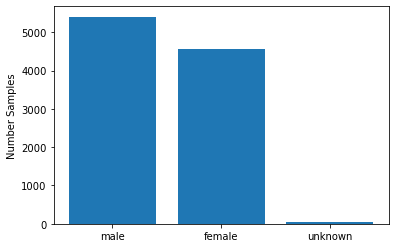

In [53]:
## HISTOGRAM WITH SEX DISTRIBUTION
bar_names = data.sex.unique()
y_pos = np.arange(len(bar_names))
samples_total = [data.loc[data.sex == MALE, SEX].count(), 
                 data.loc[data.sex == FEMALE, SEX].count(),
                 data.loc[data.sex == UNKNOWN, SEX].count()]
plt.bar(y_pos, samples_total, align='center')
plt.xticks(y_pos, bar_names)
plt.ylabel('Number Samples')
plt.show()


In [64]:
## HISTOGRAM WITH LOCALIZATION DISTRIBUTION
local_occurences = data.localization.unique()
local_occurences

array(['scalp', 'ear', 'face', 'back', 'trunk', 'chest',
       'upper extremity', 'abdomen', 'unknown', 'lower extremity',
       'genital', 'neck', 'hand', 'foot', 'acral'], dtype=object)

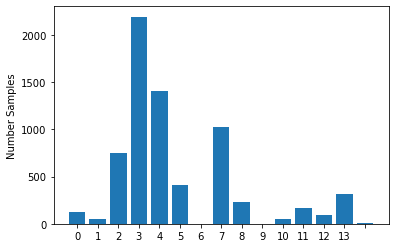

In [65]:
y_pos = np.arange(len(local_occurences))
samples_total = [data.loc[data.localization == SCALP, LOCALIZATION].count(), 
                 data.loc[data.localization == EAR, LOCALIZATION].count(),
                 data.loc[data.localization == FACE, LOCALIZATION].count(),
                 data.loc[data.localization == BACK, LOCALIZATION].count(),
                 data.loc[data.localization == TRUNK, LOCALIZATION].count(),
                 data.loc[data.localization == CHEST, LOCALIZATION].count(),
                 data.loc[data.localization == UPPER_EXTREMEMITY, LOCALIZATION].count(),
                 data.loc[data.localization == ABDOMEN, LOCALIZATION].count(),
                 data.loc[data.localization == UNKNOWN, LOCALIZATION].count(),
                 data.loc[data.localization == LOWER_EXTREMITY, LOCALIZATION].count(),
                 data.loc[data.localization == GENITAL, LOCALIZATION].count(),
                 data.loc[data.localization == NECK, LOCALIZATION].count(),
                 data.loc[data.localization == HAND, LOCALIZATION].count(),
                 data.loc[data.localization == FOOT, LOCALIZATION].count(),
                 data.loc[data.localization == ACRAL, LOCALIZATION].count()]
plt.bar(y_pos, samples_total, align='center')
plt.xticks(y_pos, np.arange(14))
plt.ylabel('Number Samples')
plt.show()


In [47]:
## DESCRIPTION OF AGE
data[AGE].describe()


count    9958.000000
mean       51.863828
std        16.968614
min         0.000000
25%        40.000000
50%        50.000000
75%        65.000000
max        85.000000
Name: age, dtype: float64

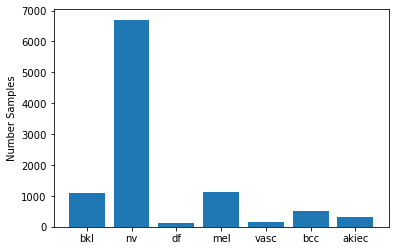

In [69]:
## DISTRIBUTION NUMBER EXAMPLES PER CLASS
y_pos = np.arange(len(classes))
samples_total = [data.loc[data.dx == BKL, DX].count(), 
                 data.loc[data.dx == NV, DX].count(),
                 data.loc[data.dx == DF, DX].count(),
                 data.loc[data.dx == MEL, DX].count(),
                 data.loc[data.dx == VASC, DX].count(),
                 data.loc[data.dx == BCC, DX].count(),
                 data.loc[data.dx == AKIEC, DX].count()]
plt.bar(y_pos, samples_total, align='center')
plt.xticks(y_pos, classes)
plt.ylabel('Number Samples')
plt.show()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002971994F780>,
      dtype=object)

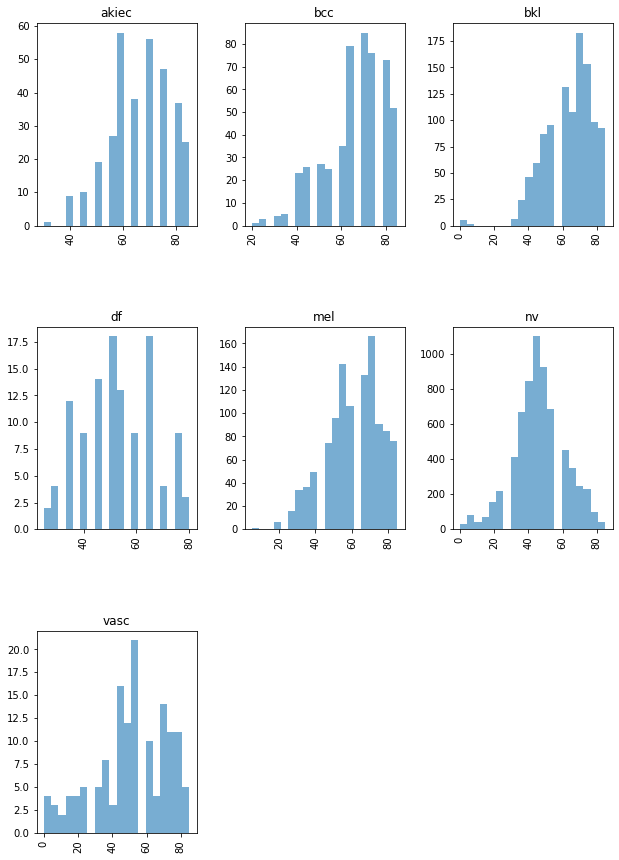

In [89]:
## CHECK DISTRIBUTION OF CLASSES BY AGE
data[AGE].hist(by=data[DX], bins=20, alpha=0.6, figsize=(10, 15))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029718DBE2B0>,
      dtype=object)

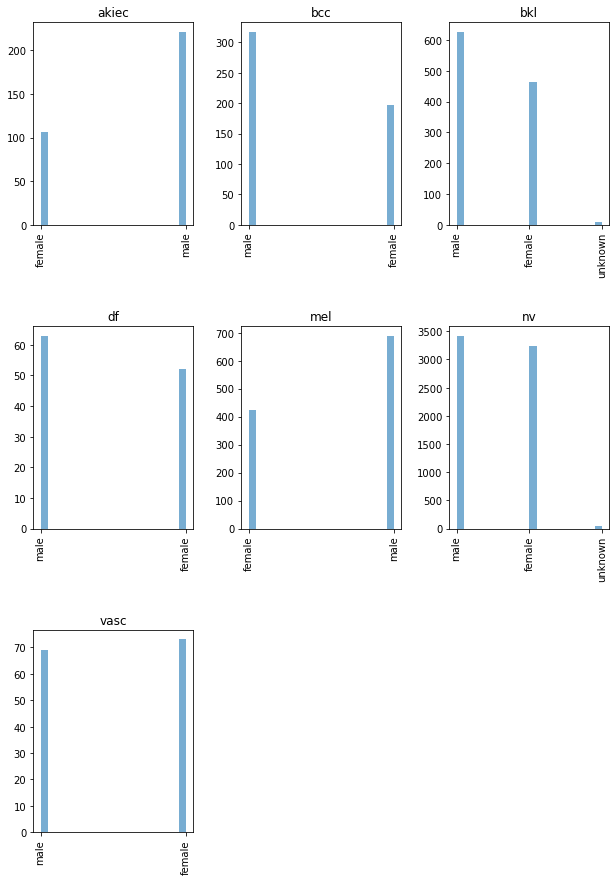

In [90]:
## CHECK DISTRIBUTION OF CLASSES BY SEX
data[SEX].hist(by=data[DX], bins=20, alpha=0.6, figsize=(10, 15))